Considere el la siguiente ecuación diferencial. 


\begin{align*}
\mathrm{d}X_{t} & =\alpha X_{t}\left[1-\left(\dfrac{X_{t}}{K}\right)^{m}\right]\mathrm{d}t+\sigma X_{t}\mathrm{d}B_{t},t>t_{0}\\
X_{t_{0}} & =x_{0},
\end{align*}
dinde $x_{0}\left(\omega\right)$ es una variable aleatoria absolutamente
continua acotada $x_{0}:\Omega\to\left[a_{1},a_{2}\right]\subset\left(0,1\right)$.
Asumamos que $B_{t}$ es el movimiento browniano estandar y $x_{0}$
estan definidas en un espacio de probabilidad $\left(\mathcal{P},\Omega,\mathcal{F}\right)$. 

Pretendemos resolver la ecuación diferencial. 



In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Condicion inicial. 

x_0 = np.random.uniform()

# Parametros
alpha = 0.1
m = 5
max_pob = 400 # K
sigma = 2 ** (-2)

system_pars = [alpha, m, max_pob, sigma]

Ahora, considere las siguientes funciones auxiliares. 


\begin{align*}
u\left(t,X_{t}\right) & =\alpha X_{t}\left[1-\left(\dfrac{X_{t}}{K}\right)^{m}\right]\\
v\left(t,X_{t}\right) & =\sigma X_{t}
\end{align*}

Pudiendo reescribir el sistema. 

\begin{align*}
\mathrm{d}X_{t} & =u\left(t,X_{t}\right)\mathrm{d}t+v\left(t,X_{t}\right)\mathrm{d}B_{t},t>t_{0}\\
X_{t_{0}} & =x_{0},
\end{align*}


In [66]:
def u(t, x, pars):
    alpha = pars[0]
    m = pars[1]
    k = pars[2]
    y = alpha * x * k * (1 - (x / k) ** m)
    return y

def v(t, x, pars):
    sigma = pars[3]
    y = sigma * x
    return y


Ahora, conociendo la condición incial, mediante el método de Euler-Maruyama podemos calcular la trayectoria.


$$
X_{t_{i+1}}=X_{t_{i}}+u\left(t_{i},X_{t_{i}}\right)\Delta t_{i}+v\left(t_{i},X_{t_{i}}\right)\Delta W_{i},
$$

donde $\Delta t_{i}=t_{i+1}-t_{i},\Delta W_{i}=W_{i+1}-W_{i}$


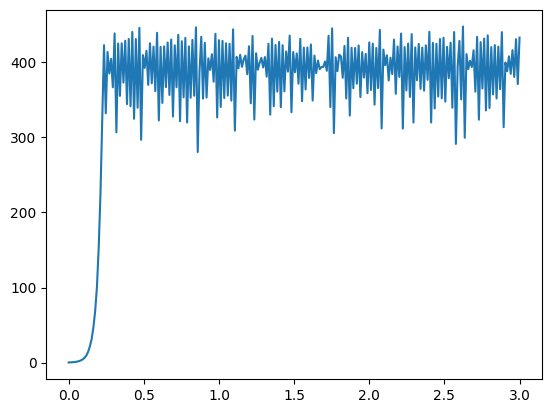

In [67]:
t = 3 # Tiempo Final, se asume Tiempo inicial igual a cero
n_p = 2 ** 8 # Numero de puntos

delta_t = t / (n_p - 1)

dw = np.sqrt(delta_t) * np.random.standard_normal(size = (n_p - 1))
x_t = [x_0]
for i in range(n_p - 1):
    xm1 = x_t[i] + u(1, x_t[i], system_pars) * delta_t + v(1, x_t[i], system_pars) * dw[i]
    x_t.append(xm1)

time = np.linspace(0, t, n_p)
plt.plot(time, x_t)